# Importance sampling

We want to use the sequential importance sampling algorithm to obtain an approximation of the probability density $p(x) = 0.7 \mathcal{N}(3,1) + 0.3 \mathcal{N}(-2,1)$. To do that we will use the density of importance $\pi(x) = \mathcal{N}(0,9)$ and $30$ particles. With $\mathcal{N}(\mu,\sigma^2)$, the normal density with mean equal to $\mu$ and variance equal to $\sigma^2$}.

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

### Probability density function we want to approximate

$$
    p(x) = 0.7 \mathcal{N}(3,1) + 0.3 \mathcal{N}(-2,1)
$$

In [2]:
# Probability density function we want to approximate
def p(x):
    norm1 = norm(loc = 3, scale = 1)
    norm2 = norm(loc = -2, scale = 1)
    return 0.7 * norm1.pdf(x = x) + 0.3 * norm2.pdf(x = x)

### Importance probability density function

$$
    \pi(x) = \mathcal{N}(0,9)
$$

In [4]:
# Importance probability density function
importanceDensity = norm(loc = 0, scale = 3)
def piPdf(x):
    return importanceDensity.pdf(x = x)
#
# Importance probability density function samples
def piSample(nbSample):
    return importanceDensity.rvs(size = nbSample)

### Variables needed for the implementation

In [5]:
# Variables needed for the implementation
nbParticle = 30
xTilde = np.zeros(shape = nbParticle)
w = np.zeros(shape = nbParticle)
pN  = np.zeros(shape = nbParticle)

#### Density Approximation -- Case $Z=1$

We have to compute :

$$
    \tilde{x}^{(i)} \sim \pi(x)
$$

The density $p(x)$ will be approximated by the quantity:
$$
    p_{N}(x) = \frac{\sum_{i=1}^{N} w(\tilde{x}^{(i)}) \delta_{\tilde{x}^{(i)}}(x)}{N}
$$

With

$$
    w(\tilde{x}^{(i)}) = \frac{p(\tilde{x}^{(i)})}{\pi(\tilde{x}^{(i)})}
$$

In [6]:
for i in range(0, nbParticle, 1):
    xTilde[i] = piSample(nbSample = 1)
    pTilde = p(x = xTilde[i])
    piTilde = piPdf(x = xTilde[i])
    w[i] = pTilde / piTilde
for i in range(0, nbParticle, 1):
    pN[i] = w[i] / nbParticle

C:\Users\dell\AppData\Local\Temp\ipykernel_18372\428679554.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xTilde[i] = piSample(nbSample = 1)


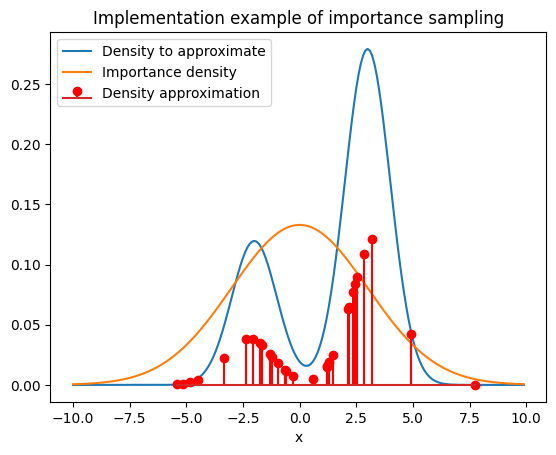

In [7]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, p(x), label = 'Density to approximate')
plt.plot(x, piPdf(x = x), label = 'Importance density')
plt.stem(xTilde, pN, linefmt = 'ro', label = 'Density approximation ')
plt.title('Implementation example of importance sampling')
plt.xlabel('x')
plt.legend()
plt.show()

#### Cleaning the variables to be able to do a new experiment

In [8]:
del nbParticle, xTilde, pTilde, piTilde, w, pN

### Variables needed for the implementation

In [9]:
# Variables needed for the implementation
nbParticle = 30
xTilde = np.zeros(shape = nbParticle)
w = np.zeros(shape = nbParticle)
wNormalized  = np.zeros(shape = nbParticle)

#### Density Approximation -- Case $Z \neq 1$

We have to compute :

$$
    \tilde{x}^{(i)} \sim \pi(x)
$$

The density $p(x)$ will be approximated by the quantity:
$$
    p_{N}(x) = \sum_{i=1}^{N} \tilde{w}^{(i)}  \delta_{\tilde{x}^{(i)}}(x) \text{ with } \sum_{i=1}^{N} \tilde{w}^{(i)} = 1
$$

With

$$
    \tilde{w}^{(i)} = \frac{w\left(\tilde{x}^{(i)}\right)}{\sum_{j=1}^{N}w\left(\tilde{x}^{(j)}\right)} 
$$

and

$$
    w(\tilde{x}^{(i)}) = \frac{p(\tilde{x}^{(i)})}{\pi(\tilde{x}^{(i)})}
$$

In [10]:
for i in range(0, nbParticle, 1):
    xTilde[i] = piSample(nbSample = 1)
    pTilde = p(x = xTilde[i])
    piTilde = piPdf(x = xTilde[i])
    w[i] = pTilde / piTilde
wSum = np.sum(w)
for i in range(0, nbParticle, 1):
    wNormalized[i] = w[i] / wSum

C:\Users\dell\AppData\Local\Temp\ipykernel_18372\1769068688.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xTilde[i] = piSample(nbSample = 1)


In [11]:
wNormalizedSum = np.sum(wNormalized)
print('The sum of the normalized weights: ', wNormalizedSum)

The sum of the normalized weights:  0.9999999999999999


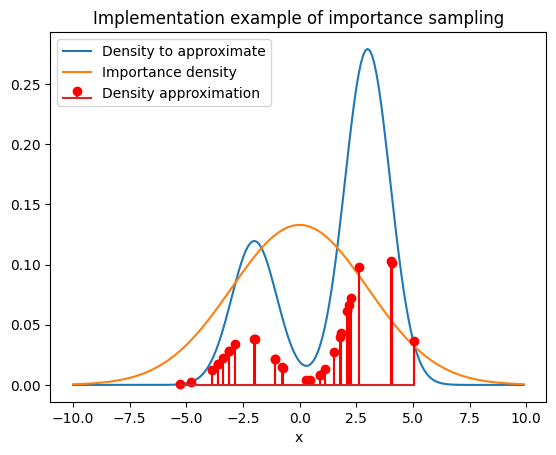

In [12]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, p(x), label = 'Density to approximate')
plt.plot(x, piPdf(x = x), label = 'Importance density')
plt.stem(xTilde, wNormalized, linefmt = 'ro', label = 'Density approximation ')
plt.title('Implementation example of importance sampling')
plt.xlabel('x')
plt.legend()
plt.savefig('ISExample.png')
plt.show()